In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

## Vortex

In [2]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [3]:
gamma = 5.0
x_vortex, y_vortex = 0.0, 0.0

In [12]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - yv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

In [16]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * numpy.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

In [17]:
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

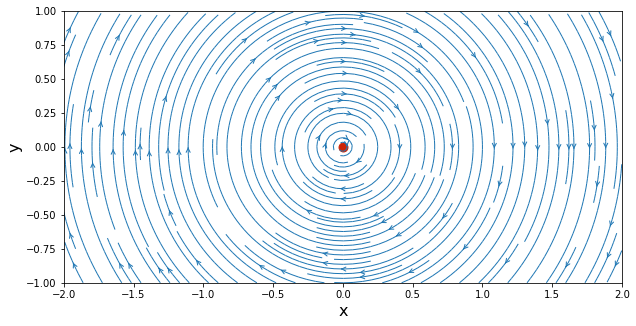

In [18]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_vortex, v_vortex,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

## Vortex and Sink

In [21]:
strength_sink = -1.0
x_sink, y_sink = 0.0, 0.0

In [24]:
def get_velocity_sink(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink 
    xs: float
        x-coordinate of the source (or sink)
    ys: float
        y-coordinate of the source (or sink)
    X: 2D Numpy array of the floats 
        x-coordinates of the mesh points
    Y: 2D Numpy Array of Floats
        y-coordinates of the mesh points
        
    Returns
    -------
    u: 2D Numpy array of float
        x-component of the velocity vector field
    v: 2D Numpy array of floats 
        y-component of the velocity vector field
    """
    
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [25]:
def get_stream_function_sink(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    
    psi = strength / (2 * numpy.pi) * numpy.arctan2((Y - ys), (X - xs))
    
    return psi

In [29]:
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

In [30]:
u = u_sink + u_vortex
v = v_sink + v_vortex

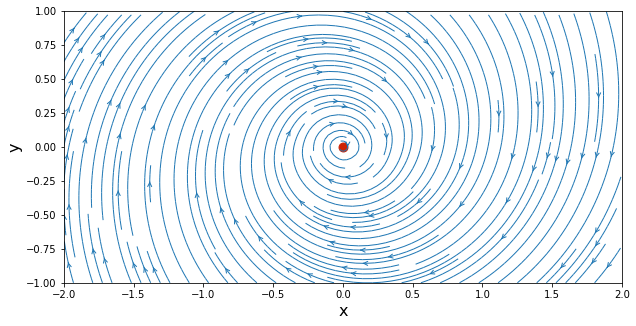

In [31]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');